In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [2]:
train_cleaned = pd.read_csv('../datasets/train_cleaned.csv')
test_cleaned = pd.read_csv('../datasets/test_cleaned.csv')
#import the csv as dataframes

In [3]:
train_cleaned.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,109,533352170,60,RL,68.0,13517,Pave,Unknown,IR1,...,0,0,Unknown,Unknown,Unknown,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,Unknown,IR1,...,0,0,Unknown,Unknown,Unknown,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,Pave,Unknown,Reg,...,0,0,Unknown,Unknown,Unknown,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,Pave,Unknown,Reg,...,0,0,Unknown,Unknown,Unknown,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,Pave,Unknown,IR1,...,0,0,Unknown,Unknown,Unknown,0,3,2010,WD,138500


In [4]:
train_cleaned.drop(columns = ['Unnamed: 0'], inplace=True)


In [5]:
test_cleaned.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,1,2718,905108090,90,RL,68.0,9662,Pave,NaN,IR1,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,4,625,535105100,20,RL,68.0,9500,Pave,NaN,IR1,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
test_cleaned.drop(columns = ['Unnamed: 0'], inplace=True)


## EDA: Histogram


### Target Variable's Distribution
We need to first understand the distribution of our target variable, SalePrice

/Users/dennischan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Sale Price'), Text(0, 0.5, 'count')]

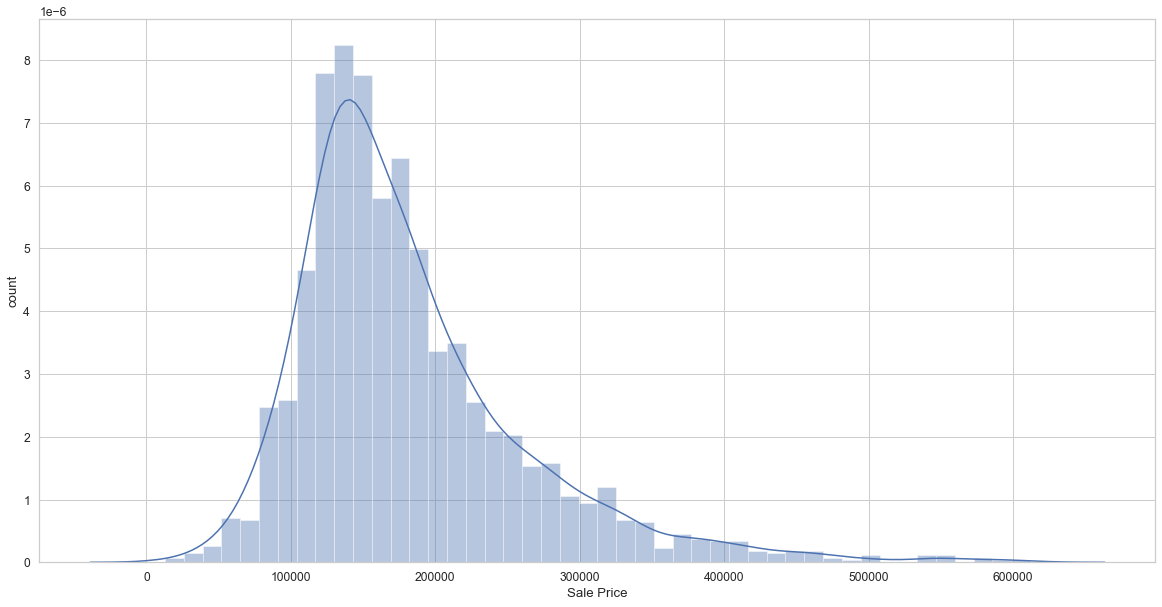

In [7]:
plt.figure(figsize=(20,10))
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
train_cleaned['SalePrice']).set(xlabel = 'Sale Price', ylabel = "count")
#we plot a histogram for the sale price in order to understand its distribution

In [8]:
train_cleaned['SalePrice'].describe()
#to look at the description of SalePrice dataset

count      2049.000000
mean     181479.018058
std       79295.913255
min       12789.000000
25%      129800.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [9]:
train_cleaned['SalePrice'].mode(dropna=False)
# to find the mode of the dataset

0    130000
dtype: int64

#### SalePrice's distribution explained
- we can conclude that housing prices has a unimodal distribution with a right skew.
- most houses are sold at 130000, in other words, they are the mode
- the median of house sale is at 162500

### Numerical data's distribution

In [10]:
train_cleaned.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,68.0,13517,Pave,Unknown,IR1,Lvl,...,0,0,Unknown,Unknown,Unknown,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,Unknown,IR1,Lvl,...,0,0,Unknown,Unknown,Unknown,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Unknown,Reg,Lvl,...,0,0,Unknown,Unknown,Unknown,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Unknown,Reg,Lvl,...,0,0,Unknown,Unknown,Unknown,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,Unknown,IR1,Lvl,...,0,0,Unknown,Unknown,Unknown,0,3,2010,WD,138500


In [11]:
train_cleaned._get_numeric_data()
#to get a brief sense of the numeric variables in the dataset

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,68.0,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,1587,921126030,20,79.0,11449,8,5,2007,2007,0.0,...,0,276,0,0,0,0,0,1,2008,298751
2045,785,905377130,30,68.0,12342,4,5,1940,1950,0.0,...,158,0,0,0,0,0,0,3,2009,82500
2046,916,909253010,50,57.0,7558,6,6,1928,1950,0.0,...,0,0,0,0,0,0,0,3,2009,177000
2047,639,535179160,20,80.0,10400,4,5,1956,1956,0.0,...,0,189,140,0,0,0,0,11,2009,144000


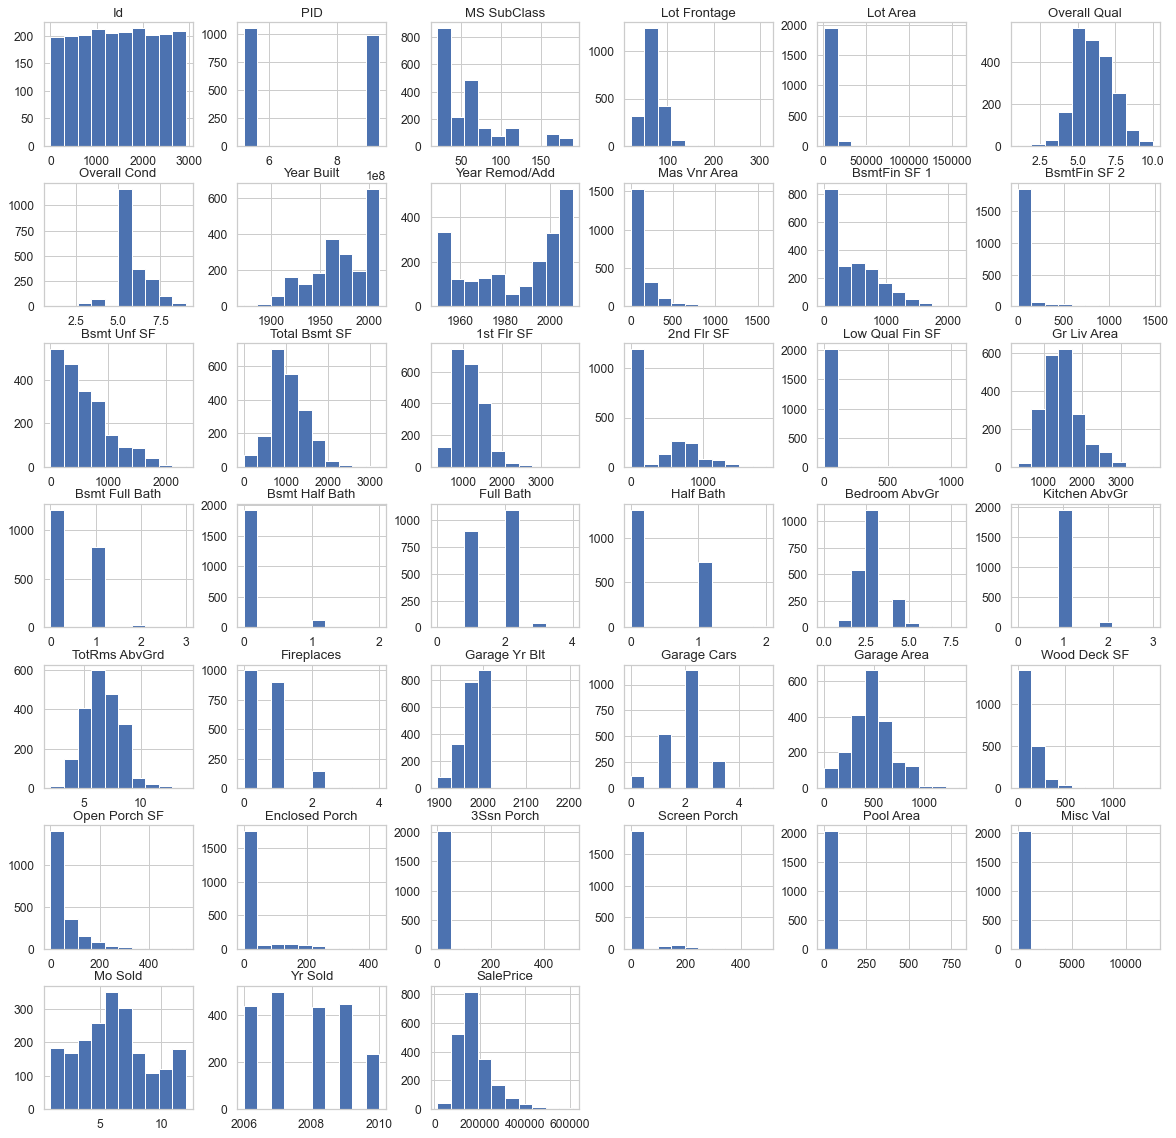

In [12]:
train_cleaned.hist(figsize=(20,20))
plt.show()
#we want to see the histogram of each column

#### Brief comments on distribution of each variable
- Id has a somewhat of a uniform distribution
- PID has a bimodal distribution where values only either start with 5 or start with 9
- MS SubClass has a unimodal distribution with a right skew
- Lot Area has a unimodal distribution with a right skew
- Overall Qual has a unimodal distribution with a slightly fatter left tail
- Overall Cond has a unimodal distribution with a fatter left tail
- Year Built has a unimodal distribution with a left skew which means that most houses are built after the year 2000
- Year Remod/Add has a bimodal distribution with a higher right peak, which means that most houses are remodeled after the year 2000
- Mas Vnr Area has a unimodal distribution with a right skew, which means that most houses has a small or the minimum amount of Masonry veneer area in square feet
- BsmtFin SF 1 has a unimodal distribution with a right skew, which means that most houses has a small Type 1 finished area in square feet
- BsmtFin SF 2 has a unimodal distribution with a right skew that is more extreme thatn BsmtFin SF 1, which means that most houses has a small and equal area finished in Type 2
- Bsmt Unf SF has a unimodal distribution with a right skew, which means that most houses has a small unfinished area in basement area
- Total Bsmt SF has a unimodal distribution with a right skew
- 1st Fir SF has a unimodal distribution with a right skew
- 2nd Fir SGD has a bimodal distribution where the left peak is higher than the right 
- Low Qual Fin SF has a unimodal distribution and most data appears to be at 0
- Gr Liv Area has a unimodal distribution with a right skew
- Bsmt Full Bath has a trimodal distribution where the left peak is highest, followed by middle and the right peak
- Bsmt Half Bath has a bimodal distribution
- Full Bath has a trimodal distribution
- Half Bath has a bimodal distribution
- Bedroom AbvGr has a unimodal distribution with a fatter right tail
- Kitchen AbvGr has a unimodal distribution
- TotRms AbvGrd has a unimodal distribution with a right skew
- Fireplaces has a bimodal distribution
- Garage Yr Blt has a unimodal distribution with a left skew
- Garage Cars has a trimodal distribution
- Garage Area has a unimodal distribution with a right skew
- Wood Ddeck SF has a unimodal distribution with a right skew
- Open Porch SF has a unimodal distribution with a right skew
- Enclosed porch has a unimodal distribution
- 3Ssn Porch has a unimodal distribution
- Screen Porch has a unimodal distribution
- Pool Area has a unimodal distribution
- Misc Val has a unimodal distribution
- Mo Sold has a Unimodal ditribution
- Yr Sold has a unimodal distribution with a right skew
- SalePrice's distribution has already been discussed above

## EDA: pairplot for scatterplot (analysing relationships between numerical variables)
**use pairplot to see how some of the stronger predictors correlate to our target (SalePrice)**

In [13]:
train_cleaned.corr()['SalePrice'].sort_values()
#sort the training data according to correlation

PID               -0.255068
Enclosed Porch    -0.135713
Kitchen AbvGr     -0.125472
Overall Cond      -0.097093
MS SubClass       -0.087331
Id                -0.051416
Bsmt Half Bath    -0.045534
Low Qual Fin SF   -0.041608
Yr Sold           -0.015174
Misc Val          -0.010323
BsmtFin SF 2       0.016398
Pool Area          0.025805
Mo Sold            0.032508
3Ssn Porch         0.048721
Screen Porch       0.134555
Bedroom AbvGr      0.137145
Bsmt Unf SF        0.190284
2nd Flr SF         0.248826
Half Bath          0.283372
Bsmt Full Bath     0.284433
Lot Area           0.303744
Wood Deck SF       0.327629
Lot Frontage       0.338280
Open Porch SF      0.338545
BsmtFin SF 1       0.445680
Fireplaces         0.473783
TotRms AbvGrd      0.509775
Mas Vnr Area       0.511273
Garage Yr Blt      0.514436
Full Bath          0.538225
Year Remod/Add     0.550872
Year Built         0.572405
1st Flr SF         0.648252
Garage Cars        0.648574
Garage Area        0.655452
Total Bsmt SF      0

**The data that correlates strongest with SalePrice are from lowest to highest correlated are 'Garage Area', 'Garage Cars','Gr Liv Area', 'Overall Qual', thus we use pairplot to visualise the relationships**

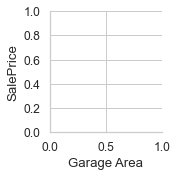

In [14]:
sns.pairplot(train_cleaned, x_vars=[ 'Garage Area' ], y_vars=['SalePrice'])


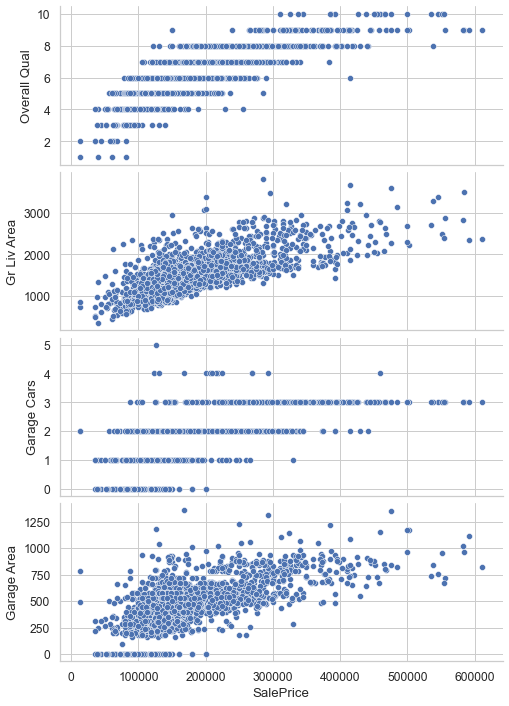

In [15]:

g =sns.pairplot(train_cleaned, y_vars=[  'Overall Qual','Gr Liv Area', 'Garage Cars','Garage Area' ], x_vars=['SalePrice'], diag_kind = None)
g.fig.set_size_inches(10,10)

#pairplot of some variables against saleprice


## EDA: Box plot (Analyzing Relationships Between Categorical Variables and SalePrice)


In [16]:
num_columns = train_cleaned.select_dtypes(np.number).columns.tolist()
cat_columns = train_cleaned.select_dtypes('object').columns.tolist()
# we save the numerical columns and categorical columns into different datasets

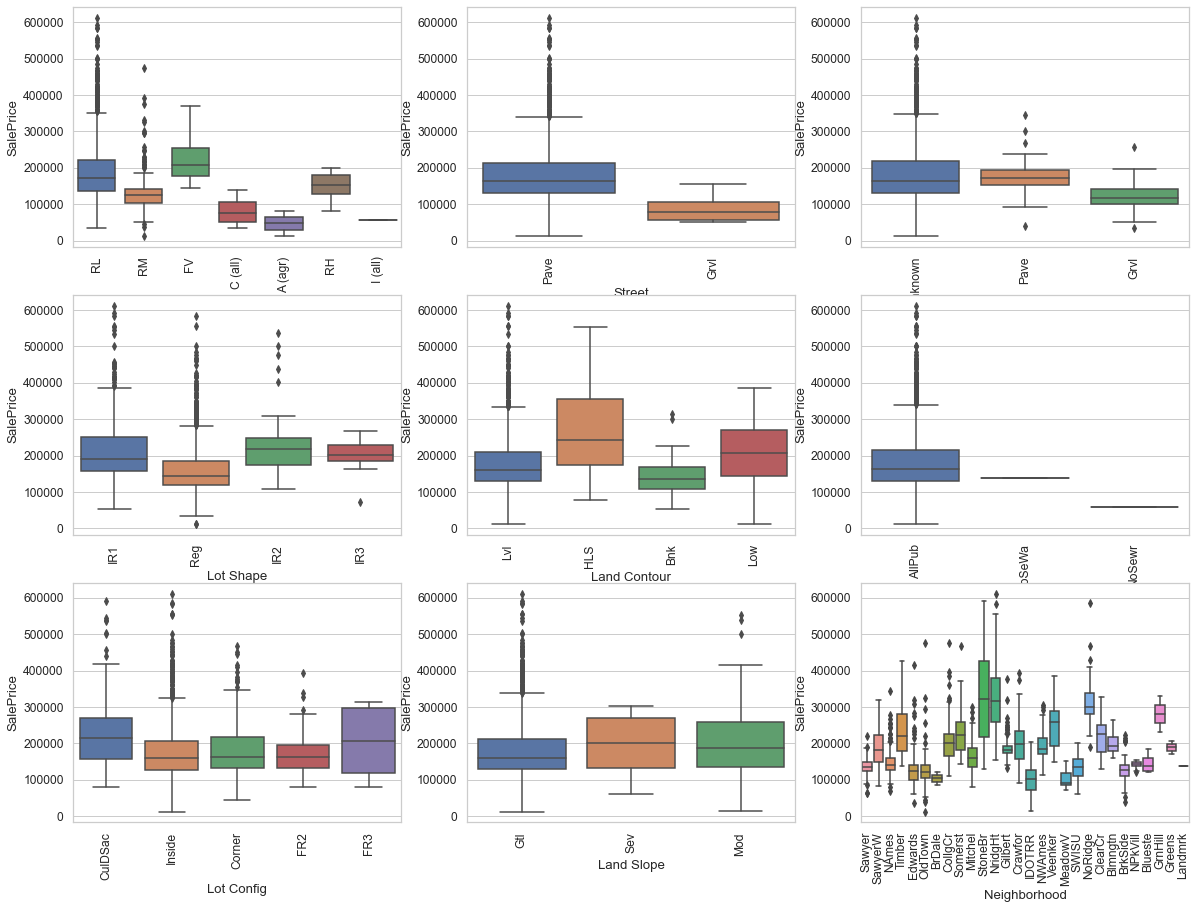

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15)) 
for var, subplot in zip(cat_columns, ax.flatten()):
    ax = sns.boxplot(x=var, y='SalePrice', data=train_cleaned, ax=subplot)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


    
#basically, we iterate through every subplot and produce the visualisation betweel all categorical variables and the saleprice

over here, we can see that most categorical variables have different distribution within each of their subcategories.

"Neighborhood" variable has the most complex and most different number of distributions. Thus, we should sort the box plots by cheapest to most expensive using the median price

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

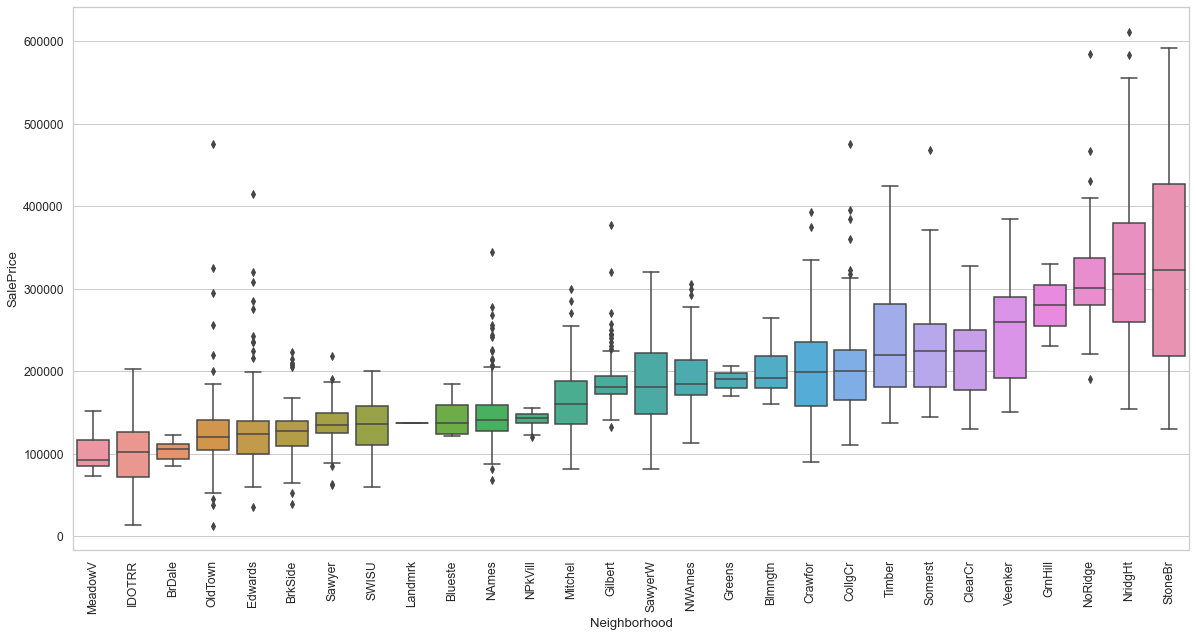

In [18]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

sorted_nb = train_cleaned.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=train_cleaned['Neighborhood'], y=train_cleaned['SalePrice'], order=list(sorted_nb.index))
# we sort the neighborhoods according to the median price that the properties are sold for

the cheapest neighborhoods houses sell for a median price of 100,000 and the most expensive at more than 300,000.

There is also much variation in dispersion depending on the neighborhood it is from.  BrDale has the lowest dispersion while GrnHill has the highest.

## Preprocessing/ Model Prep and Feature Engineering

- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection.

### Preprocessing: Feature engineering: use get_dummies to quantify categorical values


We need to use get_dummies to encode categorical data so that we can later use it for regression analysis

In [19]:

train_cat = pd.get_dummies(train_cleaned)
test_cat = pd.get_dummies(test_cleaned)

#we encode the categorical variables of both the train_cleaned dataset and test dataet

corr = train_cat.corr()
#store the corr into a dataframe

corr

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_Unknown,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,1.000000,0.175478,0.026905,-0.025146,0.031633,-0.062876,-0.025888,-0.065010,-0.090613,-0.039066,...,0.048050,-0.031567,0.039372,-0.029641,-0.036874,-0.047821,-0.001411,0.102593,-0.029732,-0.046970
PID,0.175478,1.000000,-0.003235,-0.093680,0.018315,-0.269728,0.107443,-0.348677,-0.178039,-0.251441,...,0.009797,-0.008089,0.002754,0.001217,0.031146,-0.023857,0.050422,-0.146182,0.023126,0.104413
MS SubClass,0.026905,-0.003235,1.000000,-0.376096,-0.249039,0.036962,-0.070360,0.036482,0.045333,-0.000179,...,0.056315,-0.049681,-0.006582,-0.002092,0.035248,-0.009605,-0.004649,-0.054252,-0.017582,0.065155
Lot Frontage,-0.025146,-0.093680,-0.376096,1.000000,0.355441,0.169879,-0.047902,0.098649,0.074602,0.175175,...,-0.011561,-0.019982,0.001574,-0.027911,0.031494,0.015378,-0.027728,0.104853,-0.018777,-0.074017
Lot Area,0.031633,0.018315,-0.249039,0.355441,1.000000,0.091621,-0.016461,0.029388,0.044804,0.143165,...,-0.089475,-0.010140,0.008840,0.010957,-0.010559,-0.001147,-0.007214,0.022415,-0.011423,-0.010214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sale Type_ConLI,-0.047821,-0.023857,-0.009605,0.015378,-0.001147,0.019075,0.000462,-0.002694,0.005105,0.017315,...,-0.037570,-0.010428,-0.004100,-0.002589,-0.005355,1.000000,-0.002896,-0.016924,-0.002589,-0.150934
Sale Type_ConLw,-0.001411,0.050422,-0.004649,-0.027728,-0.007214,-0.031606,0.001669,-0.045375,-0.058723,-0.028122,...,0.008881,-0.008809,-0.003464,-0.002187,-0.004524,-0.002896,1.000000,-0.014296,-0.002187,-0.127500
Sale Type_New,0.102593,-0.146182,-0.054252,0.104853,0.022415,0.329335,-0.140625,0.334404,0.314317,0.137992,...,0.051903,-0.051483,-0.020243,-0.012784,-0.026439,-0.016924,-0.014296,1.000000,-0.012784,-0.745156
Sale Type_Oth,-0.029732,0.023126,-0.017582,-0.018777,-0.011423,-0.050042,-0.022530,-0.025913,-0.047673,-0.025147,...,0.007941,-0.007877,-0.003097,-0.001956,-0.004045,-0.002589,-0.002187,-0.012784,1.000000,-0.114011


In [20]:
print(corr['SalePrice'])
#we look into the rows that are correlated with SalePrice, and drop those that have 0 correlation with the sale price


Id                -0.051416
PID               -0.255068
MS SubClass       -0.087331
Lot Frontage       0.338280
Lot Area           0.303744
                     ...   
Sale Type_ConLI    0.019582
Sale Type_ConLw   -0.035486
Sale Type_New      0.360599
Sale Type_Oth     -0.030115
Sale Type_WD      -0.213536
Name: SalePrice, Length: 305, dtype: float64


In [21]:
train_cat.to_csv('../datasets/train_cat.csv', index = False)
test_cat.to_csv('../datasets/test_cat.csv', index = False)
#export train_cat and test_cat as csv

## Business Insights
1. Which features appear to add the most value to a home?
- Overall Quad appears to add the most value to a home as it has a coeff of 0.803, which means that the dependent variable (Overall Quad) is expected to increase when that independent variable (SalePrice increases by one).

2. Which features hurt the value of a home the most?
- According to the correlation coeff, the Id hurts the value of a home the most, perhaps there is some hidden meaning behind the Id where certain Id (for example smaller numbers) are given to more expensive areas and vice versa. However, it would be hard to speculate.
- Enclosed Porch with a corr of -0.135713 is the next most negatively correlated with SalePrice


3. What are things that homeowners could improve in their homes to increase the value?
- they could revamp the overall material and finish of the house

4. What neighborhoods seem like they might be a good investment?
- StoneBr seems like a good investment because it has the largest interquartile range which could mean that by revamping the purchased house, the investor could command a good return on their investment

5. Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?
- It will generalise to other cities with similar geography as Aimes, but it would not work for cities such as New York where spaces are scarce and land is expensive.
- train the dataset based on several neighborhoods from different areas and find the common predictors of house prices.